In [1]:
import numpy as np
from sklearn.preprocessing import normalize
import random
from sklearn import linear_model
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# data preprocess
def read():
    f = open('wine.data.txt','r')
    data = np.array([line.strip().split(',') for line in f])
    data = data[:130,:]
    data = np.random.permutation(data)
    
    labels = data[:130,0:1].astype('int') - 1
    datas = data[:130,1:].astype('float')
    
    train_data = datas[:100,:]
    train_label = labels[:100,:]
    test_data = datas[100:,:]
    test_label = labels[100:,:]
    
    return train_data, train_label, test_data, test_label

train_data, train_label, test_data, test_label = read()

In [3]:
def sigmoid(z):
    
    return 1.0 / (1.0 + np.exp(-z))

def loss(W, X, Y):
    
    N = X.shape[0]
    Yn = sigmoid(np.dot(X, W))
    return (-1.0/N)*np.sum(Y*np.log(Yn+0.00000000000001)+(1-Y)*np.log(1-Yn+0.00000000000001))

def accuracy(W, X, Y):
    
    count = 0
    pred = sigmoid(np.dot(X, W))
    pred[pred>=0.5] = 1
    acc = np.sum(pred==Y)/Y.shape[0]
    
    return acc

In [4]:
# implement coordinate descent method
def coordinate_descent_train(train_data, train_label, test_data, test_label, k, lr=0.001):
    
    W = np.random.randn(train_data.shape[1], 1)
    losses, acc = [], []
    
    for epo in range(1000):
        
        Yn = sigmoid(np.dot(train_data, W))
        dW = np.dot(train_data.T, train_label-Yn)
        idx = np.argsort(-abs(dW))[:k]
        for i in idx:
            W[i] += lr * dW[i]
        
        train_loss = loss(W, train_data, train_label)
        losses.append(train_loss)
        train_acc = accuracy(W, test_data, test_label)
        acc.append(train_acc)
        
        if train_loss < 10e-4:
            break
    
    return losses, acc

In [5]:
# implement random method
def random_train(train_data, train_label, test_data, test_label, k, lr=0.001):
    
    W = np.random.randn(train_data.shape[1], 1)
    losses, acc = [], []
    
    for epo in range(1000):
        
        Yn = sigmoid(np.dot(train_data, W))
        dW = np.dot(train_data.T, train_label-Yn)
        
        idx = list(np.random.permutation(train_data.shape[1]))[:k]
        for i in idx:
            W[i] += lr * dW[i]
        
        train_loss = loss(W, train_data, train_label)
        losses.append(train_loss)
        train_acc = accuracy(W, test_data, test_label)
        acc.append(train_acc)
        
        if train_loss < 10e-4:
            break
    
    return losses, acc

In [10]:
#final loss 
logistic_model = linear_model.LogisticRegression(C=1e10, multi_class='multinomial', 
                                                 solver='lbfgs', fit_intercept=False)
logistic_model.fit(train_data, np.ravel(train_label))
logistic_weight = np.asarray(logistic_model.coef_)
final_loss = loss(logistic_weight.T, train_data, train_label)
final_acc = accuracy(logistic_weight.T, test_data, test_label)
print("final loss: ", final_loss)
print("final acc : ", final_acc)

final loss:  0.054182206607047916
final acc :  0.5666666666666667


In [ ]:
# k = 1

In [29]:
losses, acc = coordinate_descent_train(train_data, train_label, test_data, test_label, k=1, lr=0.01)
print("final loss: ", losses[-1])
print("final acc : ", acc[-1])

final loss:  3.255915666740857
final acc :  0.7


In [30]:
random_losses, random_acc = random_train(train_data, train_label, test_data, test_label, k=1, lr=0.01)
print("final loss: ", random_losses[-1])
print("final acc : ", random_acc[-1])

final loss:  4.190704869249155
final acc :  0.9666666666666667


In [ ]:
# k = 3

In [32]:
losses_3, acc_3 = coordinate_descent_train(train_data, train_label, test_data, test_label, k=3, lr=0.01)
print("final loss: ", losses_3[-1])
print("final acc : ", acc_3[-1])

final loss:  2.6061704864179136
final acc :  0.6


In [33]:
random_losses_3, random_acc_3 = random_train(train_data, train_label, test_data, test_label, k=3, lr=0.01)
print("final loss: ", random_losses_3[-1])
print("final acc : ", random_acc_3[-1])

final loss:  3.868342956229989
final acc :  1.0


In [ ]:
# k = 5

In [35]:
losses_5, acc_5 = coordinate_descent_train(train_data, train_label, test_data, test_label, k=5, lr=0.01)
print("final loss: ", losses_5[-1])
print("final acc : ", acc_5[-1])

final loss:  3.242252039721238
final acc :  0.7


In [36]:
random_losses_5, random_acc_5 = random_train(train_data, train_label, test_data, test_label, k=5, lr=0.01)
print("final loss: ", random_losses_5[-1])
print("final acc : ", random_acc_5[-1])

final loss:  3.868342956229989
final acc :  0.9


In [ ]:
# k = 7

In [87]:
losses_7, acc_7 = coordinate_descent_train(train_data, train_label, test_data, test_label, k=7, lr=0.01)
print("final loss: ", losses_7[-1])
print("final acc : ", acc_7[-1])

final loss:  3.267390955646115
final acc :  0.7


In [94]:
random_losses_7, random_acc_7 = random_train(train_data, train_label, test_data, test_label, k=7, lr=0.01)
print("final loss: ", random_losses_7[-1])
print("final acc : ", random_acc_7[-1])

final loss:  5.802514434344987
final acc :  0.8333333333333334


In [ ]:
# k = 9

In [41]:
losses_9, acc_9 = coordinate_descent_train(train_data, train_label, test_data, test_label, k=9, lr=0.01)
print("final loss: ", losses_9[-1])
print("final acc : ", acc_9[-1])

final loss:  3.002494383141035
final acc :  0.6


In [106]:
random_losses_9, random_acc_9 = random_train(train_data, train_label, test_data, test_label, k=9, lr=0.01)
print("final loss: ", random_losses_9[-1])
print("final acc : ", random_acc_9[-1])

final loss:  4.190704869249156
final acc :  0.9


In [ ]:
# k = 11

In [58]:
losses_11, acc_11 = coordinate_descent_train(train_data, train_label, test_data, test_label, k=11, lr=0.01)
print("final loss: ", losses_11[-1])
print("final acc : ", acc_11[-1])

final loss:  2.9072474680892135
final acc :  0.8


In [112]:
random_losses_11, random_acc_11 = random_train(train_data, train_label, test_data, test_label, k=11, lr=0.01)
print("final loss: ", random_losses_11[-1])
print("final acc : ", random_acc_11[-1])

final loss:  5.480152521325822
final acc :  0.9


In [ ]:
# k = 13

In [59]:
losses_13, acc_13 = coordinate_descent_train(train_data, train_label, test_data, test_label, k=13, lr=0.01)
print("final loss: ", losses_13[-1])
print("final acc : ", acc_13[-1])

final loss:  2.872786271753364
final acc :  0.8


In [60]:
random_losses_13, random_acc_13 = random_train(train_data, train_label, test_data, test_label, k=13, lr=0.01)
print("final loss: ", random_losses_13[-1])
print("final acc : ", random_acc_13[-1])

final loss:  3.868342956229989
final acc :  0.9


In [81]:
def plot(losses, random_losses, final_loss):
    
    x = [t+1 for t in range(len(losses))]
    x_ticks = [100*t for t in range(0,11)]
    plt.figure()
    plt.plot(x, losses/10, label='coordinate', color='r')
    plt.plot(x, random_losses/10, label='random', color='y')
    plt.plot(x, final_loss, label='final', color='b')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.xticks(x_ticks)
    plt.grid(True, linestyle = "--", color = "gray", linewidth = 0.5)
    plt.legend()
    plt.savefig("loss.png")
    plt.show()

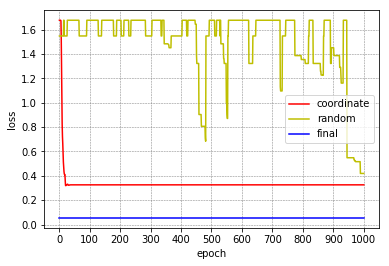

In [82]:
plot(np.array(losses), np.array(random_losses), np.array([final_loss]*1000))